[View in Colaboratory](https://colab.research.google.com/github/divsinha99/Loan_Prediction/blob/master/Loan_prediction_pipeline.ipynb)

# Loan Prediction Problem
Problem Statement
About Company : Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

## Problem :

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

## Data
Variable; Description; Loan_ID; Unique Loan ID; Gender; Male/ Female; Married; Applicant married (Y/N); Dependents; Number of dependents; Education; Applicant Education (Graduate/ Under Graduate); Self_Employed; Self employed (Y/N); ApplicantIncome; Applicant income; CoapplicantIncome; Coapplicant income; LoanAmount; Loan amount in thousands; Loan_Amount_Term; Term of loan in months; Credit_History; credit history meets guidelines; Property_Area; Urban/ Semi Urban/ Rural; Loan_Status; Loan approved (Y/N);

In [1]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [0]:
# Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# Loading the data
def load_data():
    return pd.read_csv("train.csv", sep=','), pd.read_csv("test.csv", sep=',')

In [4]:
train_data, test_data = load_data()
train_data.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


# Check for missing data

We found out that 7 out of 13 columns contain missing data.

In [17]:
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#Exploratory Data Analysis :

Here, we will study the Different Demography Vs Loan status to see which feature decides converting percentage of Loan to get approved, so that the company can specifically target these customers.

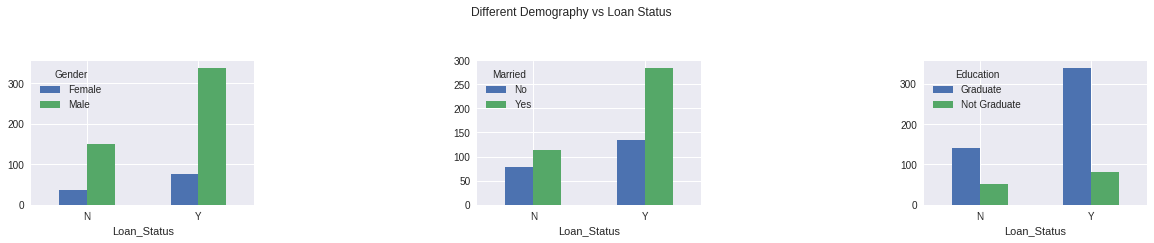

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,3)
fig.set_size_inches(20, 5)
ttl = fig.suptitle('Different Demography vs Loan Status')
ttl.set_position([.5, 1.05])

left   =  0.125  # the left side of the subplots of the figure
right  =  0.9    # the right side of the subplots of the figure
bottom =  0.5    # the bottom of the subplots of the figure
top    =  0.9    # the top of the subplots of the figure
wspace =  1.0     # the amount of width reserved for blank space between subplots
hspace = 2 # the amount of height reserved for white space between subplots

plt.subplots_adjust(
    left    =  left, 
    bottom  =  bottom, 
    right   =  right, 
    top     =  top, 
    wspace  =  wspace, 
    hspace  =  hspace
)
df_demo_1 = train_data.groupby(['Loan_Status', 'Gender']).size()
df_demo_1=df_demo_1.unstack(level=1)
df_demo_1.plot(kind = 'bar', ax = ax[0], rot=True)

df_demo_1 = train_data.groupby(['Loan_Status', 'Married']).size()
df_demo_1=df_demo_1.unstack(level=1)
df_demo_1.plot(kind = 'bar', ax = ax[1], rot=True)

df_demo_1 = train_data.groupby(['Loan_Status', 'Education']).size()
df_demo_1=df_demo_1.unstack(level=1)
df_demo_1.plot(kind = 'bar', ax = ax[2], rot=True)

So, from the above plots we can infer the below :

- Gender - We did not see any noticeable difference in loans getting approved between male and female customers applying for home loans. Percentage of loans getting approved are more or less same for both the gender. Another, point to be noted is that - Female segments of the customers are lagging behind while opting for Home Loans as compared to Male, so, the company need to target Female segment of the customers in order to grow their business.

- Married - We can see from the plot that most of the married people opts for such kind of Home Loans and almost 72 % of loan gets converted to 'Approval' status which is definitely more in case of 'Married' segment of the customers as compared to not married. So, Marital status plays an important factor for Home Loans getting approved, which is pretty obvious!!!!

- Education (Graduate/ Non-Graduate) - Percentage of loans getting converted to approved status is more in case of Graduates over Under graduates people. Almost 70% of graduated people applying for loans got it approved. So, Graduated people should be targeted more by the company for offering Home Loans.

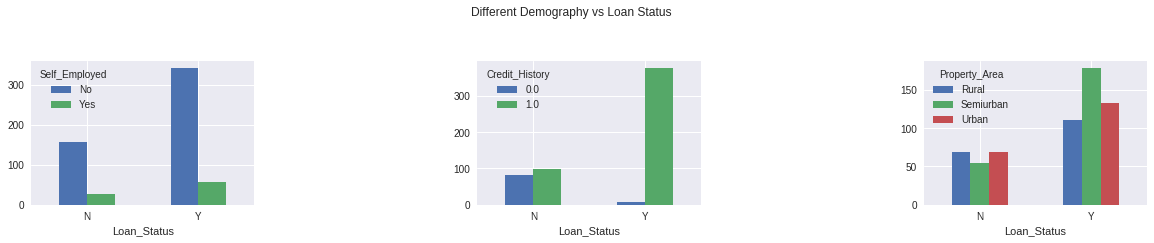

In [19]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(20, 5)

ttl = fig.suptitle('Different Demography vs Loan Status')
ttl.set_position([.5, 1.05])

left   =  0.125  # the left side of the subplots of the figure
right  =  0.9    # the right side of the subplots of the figure
bottom =  0.5    # the bottom of the subplots of the figure
top    =  0.9    # the top of the subplots of the figure
wspace =  1.0     # the amount of width reserved for blank space between subplots
hspace = 2 # the amount of height reserved for white space between subplots

plt.subplots_adjust(
    left    =  left, 
    bottom  =  bottom, 
    right   =  right, 
    top     =  top, 
    wspace  =  wspace, 
    hspace  =  hspace
)

df_demo_1 = train_data.groupby(['Loan_Status', 'Self_Employed']).size()
df_demo_1 = df_demo_1.unstack(level = 1)
df_demo_1.plot(kind = 'bar', ax = ax[0], rot=True)

df_demo_1 = train_data.groupby(['Loan_Status', 'Credit_History']).size()
df_demo_1 = df_demo_1.unstack(level = 1)
df_demo_1.plot(kind = 'bar', ax = ax[1], rot =True)

df_demo_1 = train_data.groupby(['Loan_Status', 'Property_Area']).size()
df_demo_1 = df_demo_1.unstack(level = 1)
df_demo_1.plot(kind = 'bar', ax = ax[2], rot=True)

Thus, studying the above plots we can infer the following -

- "Self_Employed" - Almost 70% of the Employed/Salaried people who applies for a home loan are eligible for Home Loan. So, the company should target the Salaried segment of the customers or provide some offers/ lower interest rate for such customers to grow their business.

- "Credit_history" - Past data has shown that loan of most of the customers having 0.0 credit hist got declined. So, such segment of customers should generally be avoided while offering loan and target more on customers having credit history of 1.0 to grow their business.

- " Property_Area" (Rural/Semi-Urban/Urban) - Semi urban areas has the most succesful rate for loans getting approved followed by urban and then rural areas.

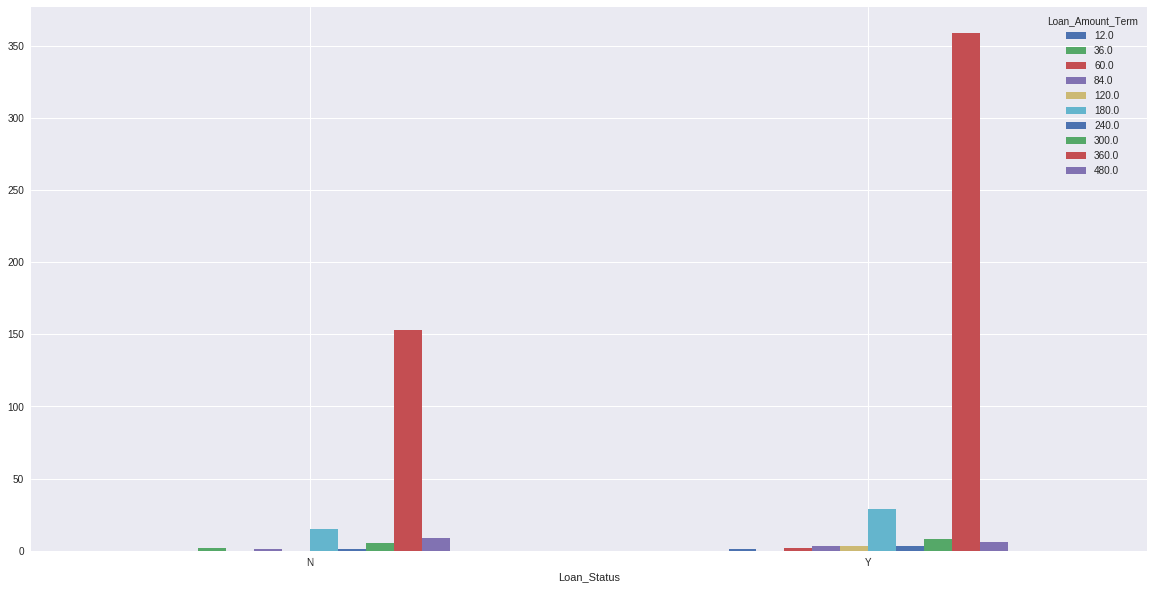

In [20]:
left   =  0.125  # the left side of the subplots of the figure
right  =  0.9    # the right side of the subplots of the figure
bottom =  0.5    # the bottom of the subplots of the figure
top    =  0.9    # the top of the subplots of the figure
wspace =  1.0     # the amount of width reserved for blank space between subplots
hspace = 2 # the amount of height reserved for white space between subplots

plt.subplots_adjust(
    left    =  left, 
    bottom  =  bottom, 
    right   =  right, 
    top     =  top, 
    wspace  =  wspace, 
    hspace  =  hspace
)

df_demo_1 = train_data.groupby(['Loan_Status', 'Loan_Amount_Term']).size()
df_demo_1 = df_demo_1.unstack(level = 1)
df_demo_1.plot(kind = 'bar', figsize = (20, 10), rot=True)

- Loan Amount Term - From Loan amount term we can see that most of the customers opt for 3 years i.e. 36 months home loan, and we can see almost 69% of the customers who opt for such loan term, loan gets approved. However, we can not say that it's an important deciding factor for loans getting approved as almost all the customers opt for 3 yrs loan only.

# Pipeline

In [0]:
from sklearn.base import BaseEstimator, TransformerMixin

# A class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

In [0]:
train_df = train_data.drop(['Loan_Status'], axis=1)

In [0]:
num_attribs = list(train_df.select_dtypes(include=[np.number]).columns)[0:3]

In [0]:
cat_attribs = list(train_df.select_dtypes(exclude=[np.number]).columns) + list(train_data.select_dtypes(include=[np.number]).columns)[3:]

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer,StandardScaler, LabelBinarizer


imputer = Imputer(strategy="median")

num_pipeline = Pipeline([
        ("select_numeric", DataFrameSelector(num_attribs)),
        ("imputer", Imputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

In [10]:
num_pipeline.fit_transform(train_df)

array([[ 0.07299082, -0.55448733, -0.21124125],
       [-0.13441195, -0.03873155, -0.21124125],
       [-0.39374734, -0.55448733, -0.94899647],
       ...,
       [ 0.43717437, -0.47240418,  1.27616847],
       [ 0.35706382, -0.55448733,  0.49081614],
       [-0.13441195, -0.55448733, -0.15174486]])

We will also need an imputer for the string categorical columns (the regular Imputer does not work on those):

In [0]:
class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X],
                                        index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.most_frequent_)

We can convert each categorical value to a one-hot vector using a OneHotEncoder.

In [12]:
!pip install sklearn_pandas

In [0]:
from sklearn.preprocessing import OneHotEncoder
from sklearn_pandas import DataFrameMapper

In [0]:
mapper = DataFrameMapper(
    [(d, LabelBinarizer()) for d in cat_attribs]
)


cat_pipeline = Pipeline([
        ("select_cat", DataFrameSelector(cat_attribs)),
        ("imputer", MostFrequentImputer()),
        ("binarizer_mapper", mapper),
    ])

In [15]:
cat_pipeline.fit_transform(train_df)

array([[1, 0, 0, ..., 1, 0, 1],
       [0, 1, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 1, 0, 1],
       ...,
       [0, 0, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 1, 0, 0]])

Finally, let's join the numerical and categorical pipelines:

In [0]:

from  sklearn.pipeline import FeatureUnion
preprocess_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

Now we have a nice preprocessing pipeline that takes the raw data and outputs numerical input features that we can feed to any Machine Learning model we want.

In [18]:
train_df_curated = preprocess_pipeline.fit_transform(train_df)
train_df_curated

array([[ 0.07299082, -0.55448733, -0.21124125, ...,  1.        ,
         0.        ,  1.        ],
       [-0.13441195, -0.03873155, -0.21124125, ...,  1.        ,
         0.        ,  1.        ],
       [-0.39374734, -0.55448733, -0.94899647, ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [ 0.43717437, -0.47240418,  1.27616847, ...,  1.        ,
         0.        ,  1.        ],
       [ 0.35706382, -0.55448733,  0.49081614, ...,  1.        ,
         0.        ,  1.        ],
       [-0.13441195, -0.55448733, -0.15174486, ...,  1.        ,
         0.        ,  0.        ]])

Let's not forget to get the labels:

In [0]:
y_train = train_data["Loan_Status"]
y_train_bin = y_train.apply(lambda x: 1 if x== 'Y' else 0)

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_df_curated, y_train_bin, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape)

(429, 639) (185, 639)


In [24]:
from sklearn import linear_model

logistic = linear_model.LogisticRegression()
logistic.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [56]:
from sklearn.model_selection import cross_val_score


logistic = linear_model.LogisticRegression()
logistic_scores = cross_val_score(logistic, X_train, y_train, cv=10)
logistic_scores.mean()

0.8157454948152623

## Confusion Matrix

Below is the model evaluation utilities for all kinds of metrics.

In [0]:
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.base import clone
from sklearn.preprocessing import label_binarize
from scipy import interp
from sklearn.metrics import roc_curve, auc 


def get_metrics(true_labels, predicted_labels):
    
    print('Accuracy:', np.round(
                        metrics.accuracy_score(true_labels, 
                                               predicted_labels),
                        4))
    print('Precision:', np.round(
                        metrics.precision_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
    print('Recall:', np.round(
                        metrics.recall_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
    print('F1 Score:', np.round(
                        metrics.f1_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
                        

def train_predict_model(classifier, 
                        train_features, train_labels, 
                        test_features, test_labels):
    # build model    
    classifier.fit(train_features, train_labels)
    # predict using model
    predictions = classifier.predict(test_features) 
    return predictions    


def display_confusion_matrix(true_labels, predicted_labels, classes=[1,0]):
    
    total_classes = len(classes)
    level_labels = [total_classes*[0], list(range(total_classes))]

    cm = metrics.confusion_matrix(y_true=true_labels, y_pred=predicted_labels, 
                                  labels=classes)
    cm_frame = pd.DataFrame(data=cm, 
                            columns=pd.MultiIndex(levels=[['Predicted:'], classes], 
                                                  labels=level_labels), 
                            index=pd.MultiIndex(levels=[['Actual:'], classes], 
                                                labels=level_labels)) 
    print(cm_frame) 
    
def display_classification_report(true_labels, predicted_labels, classes=[1,0]):

    report = metrics.classification_report(y_true=true_labels, 
                                           y_pred=predicted_labels, 
                                           labels=classes) 
    print(report)
    
    
    
def display_model_performance_metrics(true_labels, predicted_labels, classes=[1,0]):
    print('Model Performance metrics:')
    print('-'*30)
    get_metrics(true_labels=true_labels, predicted_labels=predicted_labels)
    print('\nModel Classification report:')
    print('-'*30)
    display_classification_report(true_labels=true_labels, predicted_labels=predicted_labels, 
                                  classes=classes)
    print('\nPrediction Confusion Matrix:')
    print('-'*30)
    display_confusion_matrix(true_labels=true_labels, predicted_labels=predicted_labels, 
                             classes=classes)


def plot_model_decision_surface(clf, train_features, train_labels,
                                plot_step=0.02, cmap=plt.cm.RdYlBu,
                                markers=None, alphas=None, colors=None):
    
    if train_features.shape[1] != 2:
        raise ValueError("X_train should have exactly 2 columnns!")
    
    x_min, x_max = train_features[:, 0].min() - plot_step, train_features[:, 0].max() + plot_step
    y_min, y_max = train_features[:, 1].min() - plot_step, train_features[:, 1].max() + plot_step
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    clf_est = clone(clf)
    clf_est.fit(train_features,train_labels)
    if hasattr(clf_est, 'predict_proba'):
        Z = clf_est.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
    else:
        Z = clf_est.predict(np.c_[xx.ravel(), yy.ravel()])    
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap)
    
    le = LabelEncoder()
    y_enc = le.fit_transform(train_labels)
    n_classes = len(le.classes_)
    plot_colors = ''.join(colors) if colors else [None] * n_classes
    label_names = le.classes_
    markers = markers if markers else [None] * n_classes
    alphas = alphas if alphas else [None] * n_classes
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y_enc == i)
        plt.scatter(train_features[idx, 0], train_features[idx, 1], c=color,
                    label=label_names[i], cmap=cmap, edgecolors='black', 
                    marker=markers[i], alpha=alphas[i])
    plt.legend()
    plt.show()


def plot_model_roc_curve(clf, features, true_labels, label_encoder=None, class_names=None):
    
    ## Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    if hasattr(clf, 'classes_'):
        class_labels = clf.classes_
    elif label_encoder:
        class_labels = label_encoder.classes_
    elif class_names:
        class_labels = class_names
    else:
        raise ValueError('Unable to derive prediction classes, please specify class_names!')
    n_classes = len(class_labels)
    y_test = label_binarize(true_labels, classes=class_labels)
    if n_classes == 2:
        if hasattr(clf, 'predict_proba'):
            prob = clf.predict_proba(features)
            y_score = prob[:, prob.shape[1]-1] 
        elif hasattr(clf, 'decision_function'):
            prob = clf.decision_function(features)
            y_score = prob[:, prob.shape[1]-1]
        else:
            raise AttributeError("Estimator doesn't have a probability or confidence scoring system!")
        
        fpr, tpr, _ = roc_curve(y_test, y_score)      
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label='ROC curve (area = {0:0.2f})'
                                 ''.format(roc_auc),
                 linewidth=2.5)
        
    elif n_classes > 2:
        if hasattr(clf, 'predict_proba'):
            y_score = clf.predict_proba(features)
        elif hasattr(clf, 'decision_function'):
            y_score = clf.decision_function(features)
        else:
            raise AttributeError("Estimator doesn't have a probability or confidence scoring system!")

        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        ## Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

        ## Compute macro-average ROC curve and ROC area
        # First aggregate all false positive rates
        all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
        # Then interpolate all ROC curves at this points
        mean_tpr = np.zeros_like(all_fpr)
        for i in range(n_classes):
            mean_tpr += interp(all_fpr, fpr[i], tpr[i])
        # Finally average it and compute AUC
        mean_tpr /= n_classes
        fpr["macro"] = all_fpr
        tpr["macro"] = mean_tpr
        roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

        ## Plot ROC curves
        plt.figure(figsize=(6, 4))
        plt.plot(fpr["micro"], tpr["micro"],
                 label='micro-average ROC curve (area = {0:0.2f})'
                       ''.format(roc_auc["micro"]), linewidth=3)

        plt.plot(fpr["macro"], tpr["macro"],
                 label='macro-average ROC curve (area = {0:0.2f})'
                       ''.format(roc_auc["macro"]), linewidth=3)

        for i, label in enumerate(class_labels):
            plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                           ''.format(label, roc_auc[i]), 
                     linewidth=2, linestyle=':')
    else:
        raise ValueError('Number of classes should be atleast 2 or more')
        
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

In [30]:
y_pred = logistic.predict(X_test)
display_confusion_matrix(true_labels=y_test, predicted_labels=y_pred, classes=[0, 1])

          Predicted:     
                   0    1
Actual: 0         27   38
        1          2  118


## True Positive, False Positive, True Negative and False Negative

In [0]:
positive_class = 1
TP = 118
FP = 38
TN = 27
FN = 2

## Accuracy

In [32]:
fw_acc = round(metrics.accuracy_score(y_true=y_test, y_pred=y_pred), 5)
mc_acc = round((TP + TN) / (TP + TN + FP + FN), 5)
print('Framework Accuracy:', fw_acc)
print('Manually Computed Accuracy:', mc_acc)

Framework Accuracy: 0.78378
Manually Computed Accuracy: 0.78378


##Precision

In [33]:
fw_prec = round(metrics.precision_score(y_true=y_test, y_pred=y_pred), 5)
mc_prec = round((TP) / (TP + FP), 5)
print('Framework Precision:', fw_prec)
print('Manually Computed Precision:', mc_prec)

Framework Precision: 0.75641
Manually Computed Precision: 0.75641


## Recall

In [34]:
fw_rec = round(metrics.recall_score(y_true=y_test, y_pred=y_pred), 5)
mc_rec = round((TP) / (TP + FN), 5)
print('Framework Recall:', fw_rec)
print('Manually Computed Recall:', mc_rec)

Framework Recall: 0.98333
Manually Computed Recall: 0.98333


## F1-Score

In [35]:
fw_f1 = round(metrics.f1_score(y_true=y_test, y_pred=y_pred), 5)
mc_f1 = round((2*mc_prec*mc_rec) / (mc_prec+mc_rec), 5)
print('Framework F1-Score:', fw_f1)
print('Manually Computed F1-Score:', mc_f1)

Framework F1-Score: 0.85507
Manually Computed F1-Score: 0.85507


## ROC Curve and AUC

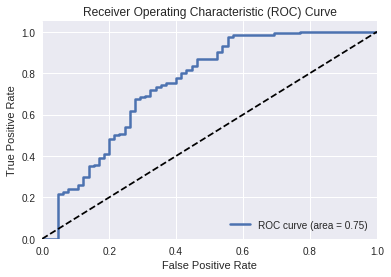

In [36]:
plot_model_roc_curve(clf=logistic, features=X_test, true_labels=y_test)

our model is trained, let's use it to make predictions on the test set:

# Random Forest classifier

## Cross val scores

In [46]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=10)
forest_scores.mean()

0.7831798046914326

In [0]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(forest_clf, X_train, y_train, cv=3)

In [54]:
forest_clf.fit(X_train,y_train)
y_pred = forest_clf.predict(X_test)
display_confusion_matrix(true_labels=y_test, predicted_labels=y_pred, classes=[0, 1])

          Predicted:     
                   0    1
Actual: 0         27   38
        1         10  110


Random forest Accuracy: 0.74054
Random forest Precision: 0.74324
Random forest Recall: 0.91667
Random forest F1-Score: 0.8209


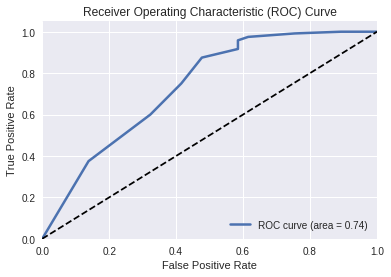

In [55]:
print('Random forest Accuracy:', round(metrics.accuracy_score(y_true=y_test, y_pred=y_pred), 5))
fw_prec = round(metrics.precision_score(y_true=y_test, y_pred=y_pred), 5)
print('Random forest Precision:', fw_prec)

fw_rec = round(metrics.recall_score(y_true=y_test, y_pred=y_pred), 5)
print('Random forest Recall:', fw_rec)
fw_f1 = round(metrics.f1_score(y_true=y_test, y_pred=y_pred), 5)
print('Random forest F1-Score:', fw_f1)
plot_model_roc_curve(clf=forest_clf, features=X_test, true_labels=y_test)

# Comparison of cross validation scores

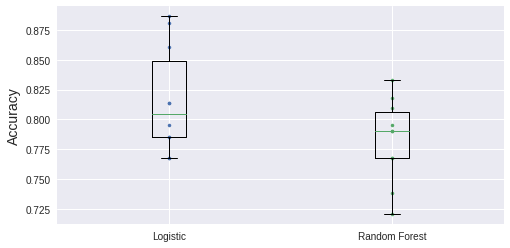

In [57]:
plt.figure(figsize=(8, 4))
plt.plot([1]*10, logistic_scores, ".")
plt.plot([2]*10, forest_scores, ".")
plt.boxplot([logistic_scores, forest_scores], labels=("Logistic","Random Forest"))
plt.ylabel("Accuracy", fontsize=14)
plt.show()